## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X= boston.drop(columns=['medv']) #todas as colunas menos medv - variáveis explicativas
y=pd.DataFrame(boston['medv']) #somente medv - variável resposta

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
#1- separando em validação e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [18]:
#2- treinando árvore com profundidade 2:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2) #profundidade 2

#treinar  com método fit:
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

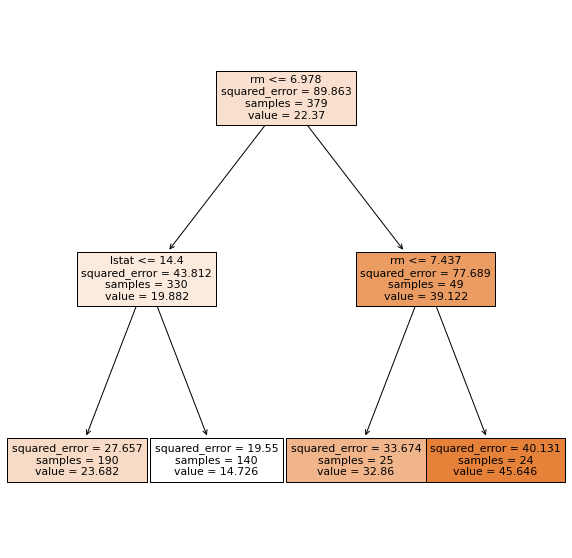

In [20]:
#3-visualizando a árvore treinada anteriormente:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, #indica o nome da árvore
                    feature_names=X.columns,  #indica as colunas
                    filled=True) #opção estética

A árvore acima está fazendo o seguinte processo:
o número médio de quartos por habitação é maior ou menor do que 6,978?
Se ele for menor, temos agora a pergunta, o status inferior da população é maior ou menor do que 14.4? Se for menor, temos um valor de 23.682 mdv, se for maior, 14.726 mdv.
Agora se o número de quartos por habitação for maior que 6,978 e menor que 7.437 o valor do mdv será 32.86, agora se ele for maior que 7.437 o seu valor será de 45.646.

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [21]:
#na variável path vamos armazenar o alpha e as impurezas:
path = regr_1.cost_complexity_pruning_path(X_train, y_train) 
path

{'ccp_alphas': array([ 0.        ,  5.28170375, 17.06061075, 41.67185681]),
 'impurities': array([25.84925111, 31.13095486, 48.19156561, 89.86342242])}

Text(0, 0.5, 'Impureza total das folhas')

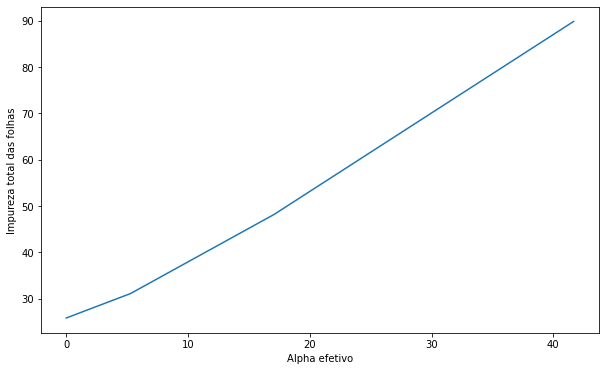

In [23]:
#plotando o grafico que traz a relação da impureza das folhas com o alpha. 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

No gráfico acima podemos ver que quanto maior o alpha efetivo, maior a impureza das folhas, portanto, quanto maior o alpha, maior a poda, resultando em uma árvore mais simplificada. 

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [12]:
#simula uma árvore para cada um dos alphas encontrados em path
clfs = [] 

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf) #guardando todas as árvores com os possíveis CCP

Text(0, 0.5, 'Profundidade da árvore')

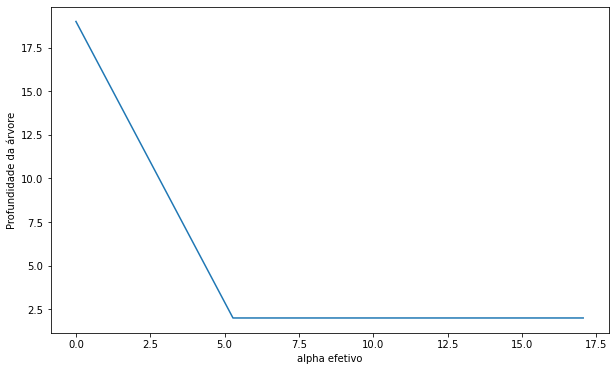

In [24]:
#plotando o grafico que traz a relação da profundidade da árvore com o alpha. 

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("alpha efetivo")
plt.ylabel("Profundidade da árvore")

Quanto maior o alpha efetivo, menor a profundidade da árvore.

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [42]:
#mse de cada árvore da lista:
[mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]

[0.0, 31.130954861711388, 31.130954861711388, 89.86342242117502]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

In [47]:
#Calculando o MSE para cada árvore na lista clfs, tando para o teste, quanto para o treino:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs] 
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

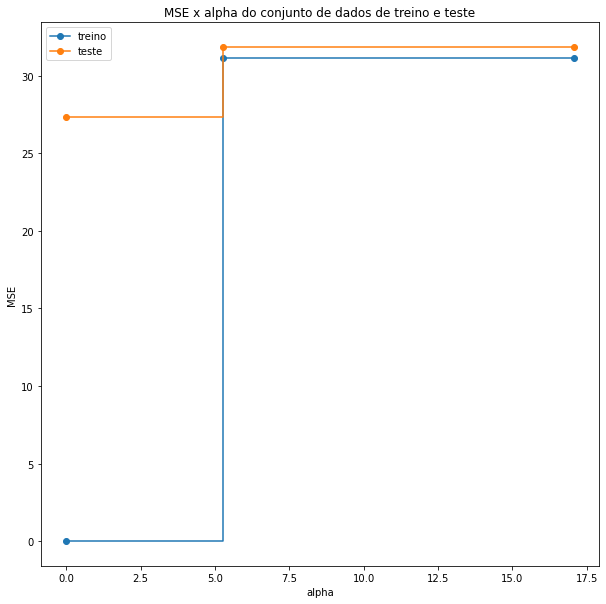

In [48]:
#plotando um gráfico que traz o mse encontrado em cada base para cada alpha. 
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

Com alpha até 5 a base de treino se mantém com erro 0, enquanto que a de teste se mantém com erro próximo a 30. Com alpha a partir de 5o a 17 tanto o erro da base de treino quanto de testes se mantém próximo ao 30. A partir do alpha 17 o erro aumenta ainda mais. 
A fim de escolher um ccp_alpha vamos utilizar um valor menor que 5, visto que até nesse valor concentra-se o menor mse para a base de treino e tabém para a base de teste. 

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [49]:
#Montando uma árvore final com o ccp_alpha 2,5 escolhido com base no gráfico acima:
arvore_final= DecisionTreeRegressor(random_state=0, ccp_alpha=2.5)
#treinando essa árvore com nossa base de treino:
arvore_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=2.5, random_state=0)

In [50]:
#printando a profundidade, R-quadrado e MSE da árvore criada no código acima:
print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE na base de testes:{mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")


Profundidade: 4
R-quadrado na base de testes: 0.67
MSE na base de testes:22.70


Levando em consideração que quanto mais próximo do 1 maior é o R-quadrado, podemos dizer que até que está um valor razoável, apesar do mse estar um pouco alto, ele é razoável se analisarmos o conjnunto de resultados obtidos. 

### 7. Visualize esta árvore.

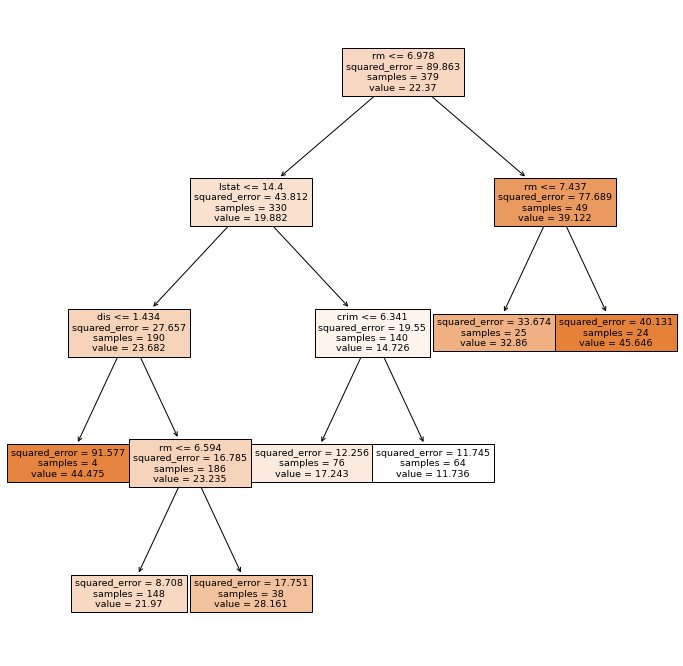

In [51]:
#3-visualizando a árvore anterior:
plt.rc('figure', figsize=(12, 12))
tp = tree.plot_tree(arvore_final, #indica o nome da árvore
                    feature_names=X.columns,  #indica as colunas
                    filled=True) #opção estética

Agora temos uma árvore com profundidade maior que a anterior, o que permite classificar um pouco melhor nossos dados e obtemos aqui um erro menor. 